## 2019701026 Q5

# Excercise 2

In Excercise 1, we computed the LDA for a multi-class problem, the IRIS dataset. In this excercise, we will now compare the LDA and PCA for the IRIS dataset.

To revisit, the iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="iris_petal_sepal.png">



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import pi

### Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing

Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [3]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

The following code divides data into training and test sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Scaling

We will now perform feature scaling as part of data preprocessing too. For this task, we will be using scikit learn `StandardScalar`.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape, y_test.shape

((30, 4), (30,))

## Write your code below

Write your code to compute the PCA and LDA on the IRIS dataset below.

## Training for LDA

In [6]:
### WRITE YOUR CODE HERE ####
# Calculating covariance of an input matrix
def calc_cov_matrix(X_input):
    n_samples = np.shape(X_input)[0]
    cov_matrix = np.array((1 / (n_samples-1)) * (X_input - X_input.mean(axis=0)).T.dot(X_input - X_input.mean(axis=0)))

    return cov_matrix

# Training the multiclass LDA model
def train(X_train, y_train):
    class_X0 = X_train[np.argwhere(y_train == 'Iris-setosa')[:, 0]]      #CLASS1
    class_X1 = X_train[np.argwhere(y_train == 'Iris-versicolor')[:, 0]]  #CLASS2
    class_X2 = X_train[np.argwhere(y_train == 'Iris-virginica')[:, 0]]   #CLASS3
    
    #Obtaining mean of 3 classes
    class_X0_mean = class_X0.mean(0)  
    class_X1_mean = class_X1.mean(0)
    class_X2_mean = class_X2.mean(0)
    
    #Obtaining mean difference between 3 classes
    class_mean_diff1 = class_X1_mean - class_X0_mean
    class_mean_diff2 = class_X2_mean - class_X0_mean
    class_mean_diff3 = class_X2_mean - class_X1_mean
    
    #Reshaping class mean differences
    class_mean_diff1 = class_mean_diff1.reshape((-1, 1))
    class_mean_diff2 = class_mean_diff2.reshape((-1, 1))
    class_mean_diff3 = class_mean_diff3.reshape((-1, 1))
    
    #Obtaining between scatter matrix Sb
    SB1 = np.dot(class_mean_diff1, class_mean_diff1.T)
    SB2 = np.dot(class_mean_diff2, class_mean_diff2.T)
    SB3 = np.dot(class_mean_diff3, class_mean_diff3.T)
    SB = SB1 + SB2 + SB3
#     print(SB.shape)

    #Obtaining covariance matrices and eventually within scatter matrix Sw
    cov_mat_class_X0 = calc_cov_matrix(class_X0)
    cov_mat_class_X1 = calc_cov_matrix(class_X1)
    cov_mat_class_X2 = calc_cov_matrix(class_X2)
    SW = cov_mat_class_X0 + cov_mat_class_X1 + cov_mat_class_X2 
    
    #Getting eigenvalues and eigenvectors for (Sw-1)Sb
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(SW).dot(SB))

    #Getting the 2 largest eigenvalues and their corresponding eigenvectors 
    eig_pairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.real(np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))))

    # Getting the eigenvector with the maximum eigenvalue.
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:1]
    weights = np.atleast_2d(eigvecs[:, idx])[:, :1]    
    
    return weights, W, SB, SW

In [7]:
weights, W_LDA, SB, SW= train(X_train, y_train)


## Training for PCA

In [8]:
#Implementing PCA Function

def pca_transform(X, n_components):

    X_mean = np.mean(X, axis=0)
    X_mean = X_mean.reshape(1, -1)
#     print("This is mean", X_mean.shape, X_mean)
    X -= X_mean
#     print("This is new X", X_input.shape)
    N = (X.shape)[0]
    constant = 1/(N - 1)

    # Calculating covariance matrix 
    cov_matrix = constant * np.dot(X.T, X)
    cov_matrix = np.array(cov_matrix, dtype=float)

    # Calculating eigen values and eigen vectors (or first n-principal components)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx][:n_components]
#     print("Shape of eigenvalues", eigenvalues.shape)
    eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
#     print("Shape of EigVec", eigenvectors.shape)
    
    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.real(np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))))
    
    
    
    X_projected = np.dot(X, eigenvectors)
#     print("This is X projected and its shape",X_projected.shape, X_projected)
    eigenvectors = eigenvectors.T
#     print("EigVec shape", eigvecs.shape)
    return X_projected, eigenvectors, eigenvalues, W

In [9]:
max_components = np.shape(X)[1]
X_projected, principal_components, variances, W_PCA = pca_transform(X_train,max_components)
W_PCA.shape

(4, 2)

## Feature subspaces for LDA with training and testing set (LD1 and LD2)

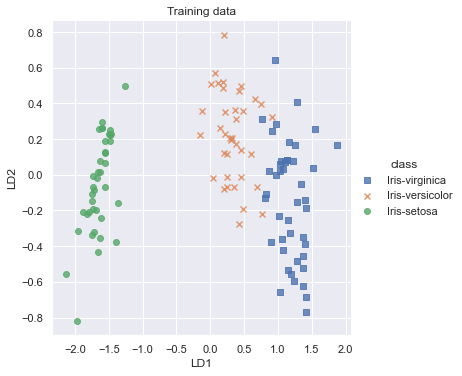

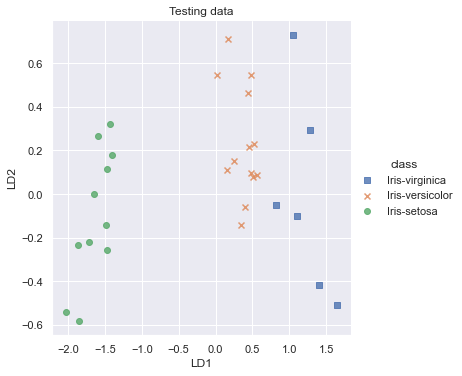

In [37]:
#Training data
X_train_lda = X_train.dot(W_LDA)
# print(X_train_lda.shape)

data=pd.DataFrame(X_train_lda)
data['class']=y_train
data.columns=["LD1","LD2","class"]


markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=True)
plt.title("Training data")
plt.show()


#Testing data
X_test_lda = X_test.dot(W_LDA)
# print(X_train_lda.shape)

data=pd.DataFrame(X_test_lda)
data['class']=y_test
data.columns=["LD1","LD2","class"]


markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=True)
plt.title("Testing data")
plt.show()

## Feature subspaces for PCA with training and testing set (PC1 and PC2)

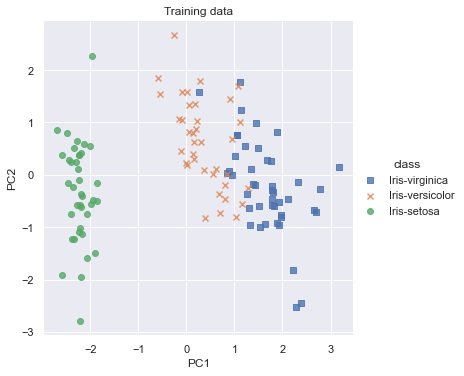

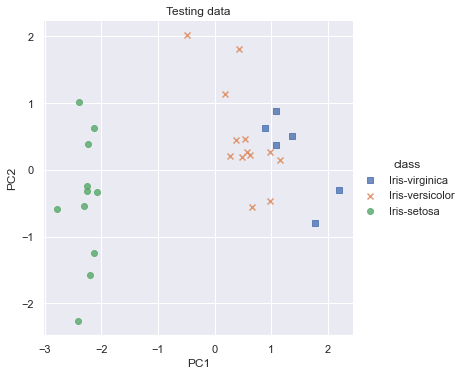

In [38]:
#Training data
X_train_pca = X_train.dot(W_PCA)
# print(X_train_lda.shape)

data=pd.DataFrame(X_train_pca)
data['class']=y_train
data.columns=["PC1","PC2","class"]


markers = ['s', 'x','o']
sns.lmplot(x="PC1", y="PC2", data=data, markers=markers,fit_reg=False, hue='class', legend=True)
plt.title("Training data")
plt.show()


#Testing data
X_test_pca = X_test.dot(W_PCA)
# print(X_train_lda.shape)

data=pd.DataFrame(X_test_pca)
data['class']=y_test
data.columns=["PC1","PC2","class"]


markers = ['s', 'x','o']
sns.lmplot(x="PC1", y="PC2", data=data, markers=markers,fit_reg=False, hue='class', legend=True)
plt.title("Testing data")
plt.show()

##### Both PCA and LDA are linear transformation techniques. However, PCA is unsupervised while LDA is a supervised dimensionality reduction technique. PCA is used to find the principal components which explains the maximum variance in the dataset whereas LDA tries to account for best between class seperability while minimising the within class variance.

##### PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class seperability.

##### This is seen by comparing the above images, where it can be clearly seen that the PCA graphs accounts for the most variance in the whole dataset,but the LDA graphs gives us the axes that account for the most variance between the three individual classes, ie, it can be viewed that while PCA gives the two PCs that maximise the variance within the whole dataset, but ignoring the between class distance, we can see that the LDA graphs produced shows the three class better seperated than in the PCA graph case. In addition, the three classes are also better clustered together, which shows minimses within class scatter.